# Density Models

In [4]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [7]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.legend()
    plt.grid()
    plt.show()

### DBSCAN

In [8]:
# import make_moons from sklearn
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

Create an instance of `DBSCAN` class from the `Skylearn` library.

In [10]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

An instance of `DBSCAN` class was created with the parameters below:
- `eps` is the maximum distance between two samples for one to be considered as being in the neighbourhood of the other. This is not a maximum bound on the distances of points within a cluster. It is the most important DBSCAN parameter to choose appropriately for our dataset and sitance function.
- `min-samples` is the number of samples in a neighbourhood for a point to be considered as a core point. This includes the point itself.

In [11]:
# fit and predict
y_db = db.fit_predict(X)

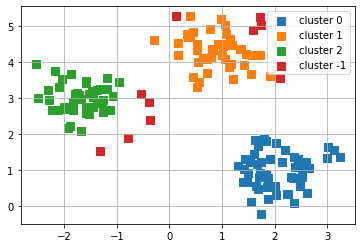

In [12]:
# plot DBSCAN clusters
plot_clusters(X, y_db)

The DBSCAN algorithm assigned clusters to the data-points. The differnce from the algorithms used in the previous sections is that DBSCAN also created a separate cluster for outliers. In the plot, the outliers are displayed as red squares.

### Non-Spherical Data

IN all the previously used examples, we used spherical-shape data in which all of the algorithms (`k-means`, `agglomerative clustering`, and `DBSCAN`) performed almost identically well. But when applied to a less ordinary shape, they do not work as well.

In [13]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

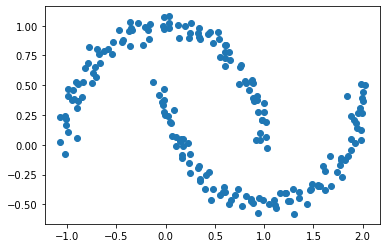

In [14]:
# plot moon-shape data
plt.scatter(X[:,0], X[:,1])
plt.show()

### Trying KMeans

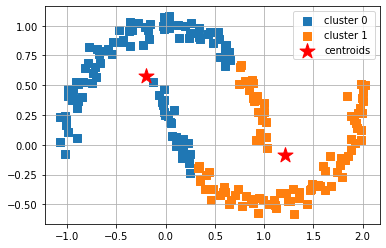

In [15]:
# import k-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)

### Trying Agglomerative Clustering (Hierarchical)

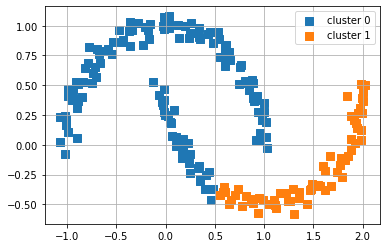

In [16]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)

The result is just as bad as with the `k-means` algorithm. In both cases, the parameters were set correctly and the algorithms did its best to return good results. However, none of the clustering algorithms mentioned above can deal with non-spherical clusters.

## Trying DBSCAN

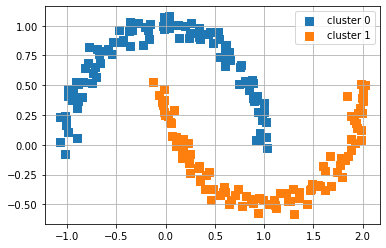

In [18]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)